# Discrete Fourier Transform
The Discrete Fourier Transform, DFT, changes an N point input signal into two point output signals. The input signal contains the signal being decomposed, while the two output signals contain the amplitudes of the component sine and cosine waves. The input signal is said to be in the time domain and the output signa in the frequency domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

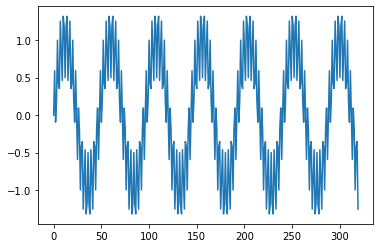

In [2]:
x = np.loadtxt(fname = "signal.dat").flatten()
plt.plot(x)

###  Script implementation of the DFT 

In [3]:
N = len(x)
rex = np.zeros(int(N/2) + 1)
imx = np.zeros(int(N/2) + 1)

for k in range(int(N/2)):
    for i in range(N):
        rex[k] = rex[k] + x[i]*np.cos(2*np.pi*k*i/N)
        imx[k] = imx[k] + x[i]*np.sin(2*np.pi*k*i/N)

###  Function implementation of the DFT 

In [4]:
def dft(signal):
    N = len(signal)
    rex = np.zeros(int(N/2) + 1)
    imx = np.zeros(int(N/2) + 1)

    for k in range(int(N/2)):
        for i in range(N):
            rex[k] = rex[k] + signal[i]*np.cos(2*np.pi*k*i/N)
            imx[k] = imx[k] + signal[i]*np.sin(2*np.pi*k*i/N)
            
    return rex, imx    

###  Method implementation of the DFT 

In [5]:
class Fourier:
    def __init__(self, signal):
        self.signal = signal
        self.N = len(signal)
        self.rex = np.zeros(int(self.N/2) + 1)
        self.imx = np.zeros(int(self.N/2) + 1)
        self.magnitude = np.zeros(int(self.N/2) + 1)
        self.phase = np.zeros(int(self.N/2) + 1)

        
    def dft(self):        
        for k in range(int(self.N/2)):
            for i in range(self.N):
                self.rex[k] = self.rex[k] + self.signal[i]*np.cos(2*np.pi*k*i/self.N)
                self.imx[k] = self.imx[k] + self.signal[i]*np.sin(2*np.pi*k*i/self.N)

                
    def dft_magnitude(self):
        self.magnitude = np.sqrt(self.rex**2 + self.imx**2)
        
    
    def dft_phase(self):
        self.phase = np.arctan(self.imx/self.rex)       
        

In [6]:
fourier = Fourier(x)
fourier.dft()
fourier.dft_magnitude()
fourier.dft_phase()

/home/manuel/anaconda3/envs/LUT/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


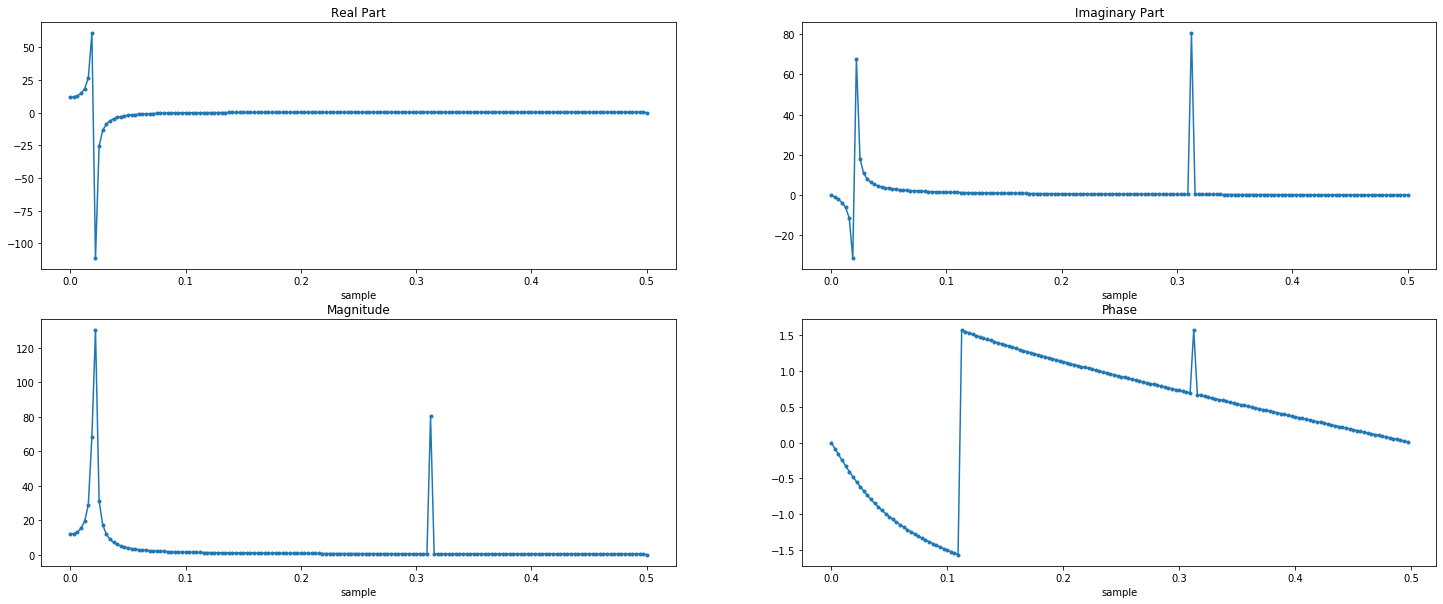

In [7]:
plt.rcParams["figure.figsize"] = (25,10)

samples = np.arange(len(fourier.rex))
normalized_frequency = samples/len(fourier.signal)

plt.subplot(2, 2, 1)
plt.plot(normalized_frequency, fourier.rex, '.-')
plt.title('Real Part')
plt.xlabel('sample')

plt.subplot(2, 2, 2)
plt.plot(normalized_frequency, fourier.imx, '.-')
plt.title('Imaginary Part')
plt.xlabel('sample')

plt.subplot(2, 2, 3)
plt.plot(normalized_frequency, fourier.magnitude, '.-')
plt.title('Magnitude')
plt.xlabel('sample')

plt.subplot(2, 2, 4)
plt.plot(normalized_frequency, fourier.phase, '.-')
plt.title('Phase')
plt.xlabel('sample')

plt.show()

### Save real and imaginary part

In [8]:
np.savetxt('rex.dat', fourier.rex)
np.savetxt('imx.dat', fourier.imx)

### Comparison of our results with Scipy

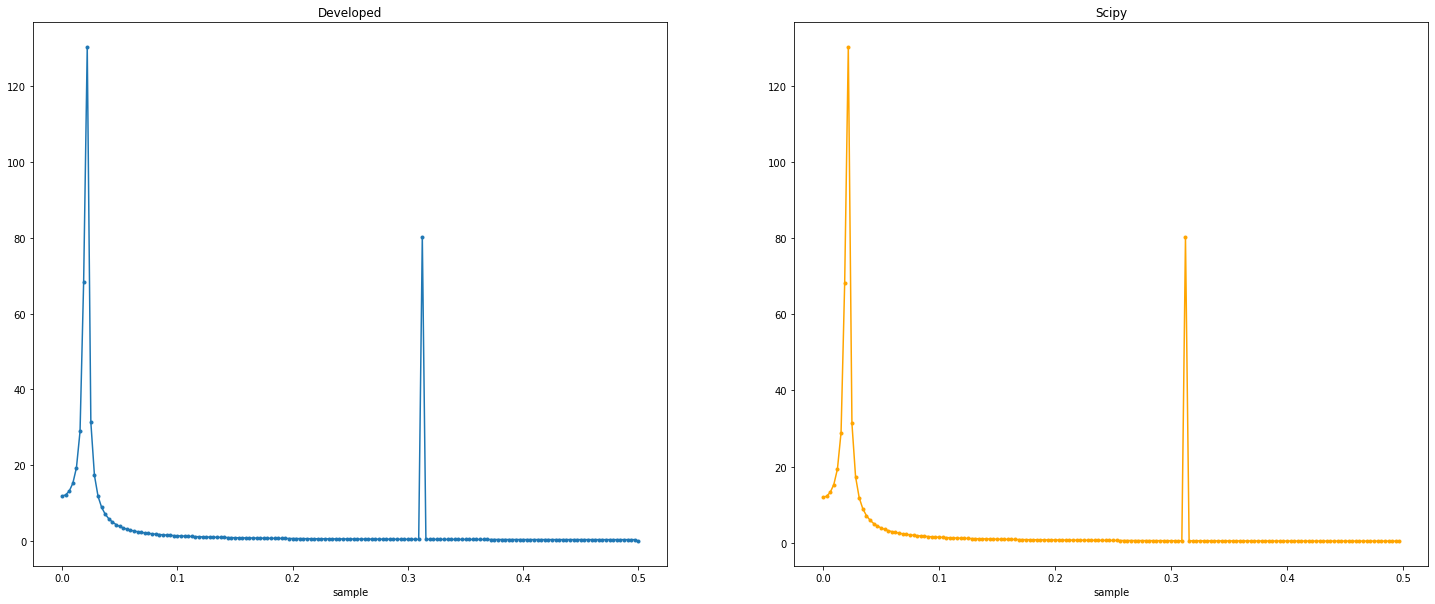

In [9]:
from scipy.fftpack import fft, ifft

y =fft(x)
mag = np.absolute(y)

plt.rcParams["figure.figsize"] = (25,10)

samples = np.arange(len(fourier.rex))
normalized_frequency = samples/len(fourier.signal)

plt.subplot(1, 2, 1)
plt.plot(normalized_frequency, fourier.magnitude, '.-')
plt.title('Developed')
plt.xlabel('sample')

plt.subplot(1, 2, 2)
plt.plot(normalized_frequency[:-1], mag[0:160], '.-', color = 'orange')
plt.title('Scipy')
plt.xlabel('sample')


plt.show()